# Load and install libraries

In [2]:
#!pip install requests_oauthlib


In [74]:
#!pip3 install transformers

In [154]:
#!pip3 install spacy-lookups-data

In [ ]:
#!python3 -m spacy download en_core_web_sm

In [76]:
#!pip3 install emoji

In [48]:
#!pip3 install textblob


In [66]:
#!pip3 install tensorflow

In [246]:
#!pip3 install torch

In [ ]:
#!pip3 install nltk

In [1]:
#!pip3 install wordcloud

In [2]:
#!pip3 install torch

In [ ]:
#!pip3 install Mastodon.py

In [ ]:
#!pip3 install scikit-learn

In [ ]:
#!pip3 install vaderSentiment

In [102]:
#!pip3 install spacy

In [3]:
import csv
from datetime import date
import pandas as pd
from mastodon import Mastodon
from datetime import datetime,timezone
import pytz
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import ast
import spacy
import en_core_web_sm
import nltk



In [33]:
#normal way to import nltk wordnet did not work for us for some reason, so this is the workaround

import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context


nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/matthiaszoettl/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [297]:
#display columns with all of its content if needed (sometimes useful to look at the whole tweet/toot)
#pd.set_option('display.max_colwidth', None)

# <span style="color:blue; font-weight:bold;">Mastodon</span>

## retreive data

The subsequent segment gathers data through the Mastodon API (Social Instance), focusing on the hashtags #bitcoin and #btc. It covers the same period as the dataset from Twitter

In [ ]:
#API call to retrieve toots for the hashtag #bitcoin

import json
import requests
import pandas as pd
from datetime import datetime

import time



stop = (int(datetime(2021, 2, 5, 0, 0).timestamp()) << 16) * 1000
max_id = (int(datetime(2021, 6, 23, 23, 59).timestamp()) << 16) * 1000
is_end = False

hashtag = 'bitcoin'
params = {
    'limit': 40,
    'max_id': max_id
}

results = []

while True:
    URL = f'https://mastodon.social/api/v1/timelines/tag/{hashtag}'
    r = requests.get(URL, params=params)
    toots = json.loads(r.text)

    if len(toots) == 0:
        break

    for t in toots:
        timestamp = pd.Timestamp(t['created_at'])
        snowflake_id = (int(timestamp.timestamp()) << 16) * 1000
        #print(f' timestamp: {timestamp}')
        
        if snowflake_id < stop:
            is_end = True
            break

        results.append(t)

    if is_end:
        print("is_end")
        break
    time.sleep(1)
    max_id = toots[-1]['id']
    tmsp = pd.Timestamp(toots[-1]['created_at'])
    formatted_timestamp = tmsp.strftime("%Y-%m-%d %H:%M")
    print(formatted_timestamp)
   
    print(max_id)
    params['max_id'] = max_id

bitcoin_toots = pd.DataFrame(results)


In [6]:
#API call to retrieve toots for the hashtag #btc

import json
import requests
import pandas as pd
from datetime import datetime

import time



stop = (int(datetime(2021, 2, 5, 0, 0).timestamp()) << 16) * 1000
max_id = (int(datetime(2021, 6, 23, 23, 59).timestamp()) << 16) * 1000
is_end = False

hashtag = 'btc'
params = {
    'limit': 40,
    'max_id': max_id
}

results = []

while True:
    URL = f'https://mastodon.social/api/v1/timelines/tag/{hashtag}'
    r = requests.get(URL, params=params)
    toots = json.loads(r.text)

    if len(toots) == 0:
        break

    for t in toots:
        timestamp = pd.Timestamp(t['created_at'])
        snowflake_id = (int(timestamp.timestamp()) << 16) * 1000
        #print(f' timestamp: {timestamp}')
        
        if snowflake_id < stop:
            is_end = True
            break

        results.append(t)

    if is_end:
        print("is_end")
        break
    time.sleep(1)
    max_id = toots[-1]['id']
    tmsp = pd.Timestamp(toots[-1]['created_at'])
    formatted_timestamp = tmsp.strftime("%Y-%m-%d %H:%M")
    print(formatted_timestamp)
   
    print(max_id)
    params['max_id'] = max_id

btc_toots = pd.DataFrame(results)


2021-06-22 05:00
106452616159354969
2021-06-20 12:26
106443046105997576
2021-06-18 16:30
106432679544309249
2021-06-17 05:00
106424304408042402
2021-06-15 05:00
106412980295784859
2021-06-14 05:00
106407317270635066
2021-06-12 05:00
106395993063908810
2021-06-10 21:50
106388640983555431
2021-06-09 16:30
106381718881629100
2021-06-08 16:30
106376056436109571
2021-06-07 05:00
106367681502527044
2021-06-05 16:30
106359069536748876
2021-06-04 05:00
106350694205526139
2021-06-02 05:00
106339369996497621
2021-06-01 05:00
106333707249439671
2021-05-30 05:00
106322383010374656
2021-05-28 15:33
106313547146927171
2021-05-27 05:00
106305395586536541
2021-05-25 05:09
106294106484949444
2021-05-23 20:55
106286504785091884
2021-05-22 05:00
106277084859188977
2021-05-21 01:34
106270613641223497
2021-05-19 16:30
106262810449902821
2021-05-18 05:00
106254435270726995
2021-05-16 21:46
106247069172173352
2021-05-15 05:00
106237448405354276
2021-05-13 11:47
106227726797483758
2021-05-12 05:00
10622046093

In [19]:
btc_toots['created_at'] = pd.to_datetime(btc_toots['created_at'], format='%Y-%m-%dT%H:%M:%S.%fZ')
btc_toots.to_csv('btc_toots.csv', index=False)

,id,created_at,in_reply_to_id,in_reply_to_account_id,sensitive,spoiler_text,visibility,language,uri,url,...,content,reblog,account,media_attachments,mentions,tags,emojis,card,poll,application
0,106460991693608499,2021-06-23 16:30:03,None,None,False,,public,en,https://bitcoinhackers.org/users/Tulipan81/sta...,https://bitcoinhackers.org/@Tulipan81/10646099...,...,"<p>Bitcoin fiat price in last day <a href=""htt...",None,"{'id': '409690', 'username': 'Tulipan81', 'acc...","[{'id': '106460991277879178', 'type': 'image',...",[],"[{'name': 'ggplot2', 'url': 'https://mastodon....",[],None,None,NaN
1,106460991674318544,2021-06-23 16:30:03,None,None,False,,public,en,https://bitcoinhackers.org/users/Tulipan81/sta...,https://bitcoinhackers.org/@Tulipan81/10646099...,...,<p>Histogram of bitcoin fiat price in last mon...,None,"{'id': '409690', 'username': 'Tulipan81', 'acc...","[{'id': '106460991245180771', 'type': 'image',...",[],"[{'name': 'ggplot2', 'url': 'https://mastodon....",[],None,None,NaN
2,106460991659690365,2021-06-23 16:30:03,None,None,False,,public,en,https://bitcoinhackers.org/users/Tulipan81/sta...,https://bitcoinhackers.org/@Tulipan81/10646099...,...,"<p>Bitcoin fiat price in last week <a href=""ht...",None,"{'id': '409690', 'username': 'Tulipan81', 'acc...","[{'id': '106460991198856979', 'type': 'image',...",[],"[{'name': 'ggplot2', 'url': 'https://mastodon....",[],None,None,NaN
3,106460991576022417,2021-06-23 16:30:03,None,None,False,,public,en,https://bitcoinhackers.org/users/Tulipan81/sta...,https://bitcoinhackers.org/@Tulipan81/10646099...,...,"<p>Bitcoin fiat price in last month <a href=""h...",None,"{'id': '409690', 'username': 'Tulipan81', 'acc...","[{'id': '106460990992640220', 'type': 'image',...",[],"[{'name': 'ggplot2', 'url': 'https://mastodon....",[],None,None,NaN
4,106460991573871959,2021-06-23 16:30:03,None,None,False,,public,en,https://bitcoinhackers.org/users/Tulipan81/sta...,https://bitcoinhackers.org/@Tulipan81/10646099...,...,<p>Histogram of bitcoin fiat price in last day...,None,"{'id': '409690', 'username': 'Tulipan81', 'acc...","[{'id': '106460991050555614', 'type': 'image',...",[],"[{'name': 'ggplot2', 'url': 'https://mastodon....",[],None,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3693,105677115420978803,2021-02-05 06:00:05,None,None,False,,public,en,https://bitcoinhackers.org/users/Tulipan81/sta...,https://bitcoinhackers.org/@Tulipan81/10567711...,...,<p>Bitcoin mined blocks distribution per pool ...,None,"{'id': '409690', 'username': 'Tulipan81', 'acc...","[{'id': '105677115334171268', 'type': 'image',...",[],"[{'name': 'ggplot2', 'url': 'https://mastodon....",[],None,None,NaN
3694,105677115307187798,2021-02-05 06:00:05,None,None,False,,public,en,https://bitcoinhackers.org/users/Tulipan81/sta...,https://bitcoinhackers.org/@Tulipan81/10567711...,...,<p>Bitcoin free space in mined blocks in last ...,None,"{'id': '409690', 'username': 'Tulipan81', 'acc...","[{'id': '105677115114942035', 'type': 'image',...",[],"[{'name': 'ggplot2', 'url': 'https://mastodon....",[],None,None,NaN
3695,105677115292037651,2021-02-05 06:00:05,None,None,False,,public,en,https://bitcoinhackers.org/users/Tulipan81/sta...,https://bitcoinhackers.org/@Tulipan81/10567711...,...,<p>Bitcoin blocks size distribution per pool i...,None,"{'id': '409690', 'username': 'Tulipan81', 'acc...","[{'id': '105677115233038544', 'type': 'image',...",[],"[{'name': 'ggplot2', 'url': 'https://mastodon....",[],None,None,NaN
3696,105677115054179017,2021-02-05 06:00:05,None,None,False,,public,en,https://bitcoinhackers.org/users/Tulipan81/sta...,https://bitcoinhackers.org/@Tulipan81/10567711...,...,"<p>Bitcoin blocks delay in last day <a href=""h...",None,"{'id': '409690', 'username': 'Tulipan81', 'acc...","[{'id': '105677114990793107', 'type': 'image',...",[],"[{'name': 'ggplot2', 'url': 'https://mastodon....",[],None,None,NaN


In [20]:
btc_toots.to_csv('data/btc_toots.csv', index=False)

## load data

In [173]:
bitcoin_toots= pd.read_csv(r'/Users/matthiaszoettl/Desktop/WU/Master/4. Semester/Ai2/Analysis/data/bitcoin_toots.csv')
btc_toots= pd.read_csv(r'/Users/matthiaszoettl/Desktop/WU/Master/4. Semester/Ai2/Analysis/data/btc_toots.csv')

#concatenate the dataframes for the hashtags #bitcoin and #btc and drop any duplicates
combined_toots = pd.concat([btc_toots, bitcoin_toots]).drop_duplicates().reset_index(drop=True)


In [308]:
# Set the display option to show the full content of a column if needed
#pd.set_option('display.max_colwidth', -1)

## preproccessing data

In [176]:
unique_values = combined_toots["language"].nunique()
print("Number of unique values in 'language2':", unique_values)

# Assuming your DataFrame is called `combined_toots`
value_counts = combined_toots["language"].value_counts()
print(value_counts)

Number of unique values in 'language2': 52
en       11746
es       1238 
fr       250  
de       227  
mt       143  
gl       67   
it       56   
ha       35   
nl       31   
ja       25   
mg       20   
su       18   
lb       17   
ca       17   
pt       16   
pl       16   
ga       15   
zh       14   
ru       13   
fi       9    
tr       8    
sv       7    
no       7    
cs       6    
sn       4    
vi       4    
tg       3    
pt-PT    3    
el       3    
so       2    
gd       2    
en-us    2    
en-gb    2    
zh-CN    1    
sk       1    
bn       1    
lv       1    
sw       1    
ur       1    
he       1    
ptPt     1    
ig       1    
enCy     1    
mi       1    
eo       1    
cy       1    
st       1    
th       1    
esAr     1    
mr       1    
uz       1    
ko       1    
Name: language, dtype: int64


In [177]:
# Keep only rows where "language" is "en"
combined_toots = combined_toots[combined_toots["language"] == "en"]




# Check the unique values and their counts after the operation
unique_values = combined_toots["language"].nunique()
print("Number of unique values in 'language' after deletion:", unique_values)

value_counts = combined_toots["language"].value_counts()
print(value_counts)


Number of unique values in 'language' after deletion: 1
en    11746
Name: language, dtype: int64


In [178]:
combined_toots.shape

(11746, 24)

In [179]:
combined_toots.dtypes

id                        int64  
created_at                object 
in_reply_to_id            float64
in_reply_to_account_id    float64
sensitive                 bool   
spoiler_text              object 
visibility                object 
language                  object 
uri                       object 
url                       object 
replies_count             int64  
reblogs_count             int64  
favourites_count          int64  
edited_at                 float64
content                   object 
reblog                    float64
account                   object 
media_attachments         object 
mentions                  object 
tags                      object 
emojis                    object 
card                      object 
poll                      object 
application               object 
dtype: object

In [180]:
combined_toots = combined_toots.convert_dtypes()
combined_toots.dtypes


id                        Int64  
created_at                string 
in_reply_to_id            Int64  
in_reply_to_account_id    Int64  
sensitive                 boolean
spoiler_text              string 
visibility                string 
language                  string 
uri                       string 
url                       string 
replies_count             Int64  
reblogs_count             Int64  
favourites_count          Int64  
edited_at                 Int64  
content                   string 
reblog                    Int64  
account                   string 
media_attachments         string 
mentions                  string 
tags                      string 
emojis                    string 
card                      string 
poll                      string 
application               string 
dtype: object

In [181]:
#parse html content of the toot
combined_toots['content_parsed'] = combined_toots['content'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text())
combined_toots['content_parsed'] = combined_toots['content_parsed'].astype(str)


In [182]:
# Create a new column 'username' by extracting the 'username' from the 'account' column
combined_toots['username'] = combined_toots['account'].apply(lambda x: ast.literal_eval(x)['username'])


In [183]:
# Remove rows where 'username' is 'Tulipan81' as this is a bot only posting the daily bitcoin price
combined_toots = combined_toots[combined_toots['username'] != 'Tulipan81']

In [184]:
#drop columns
combined_toots = combined_toots.drop(columns=["account", "media_attachments", "uri"])

In [185]:
# Convert the date column to a datetime data type
combined_toots['created_at'] = pd.to_datetime(combined_toots['created_at'], errors='coerce')

In [186]:
def preprocess_toots(toot):
    # Lowercasing
    toot = toot.lower()

    # Remove @usernames
    toot = re.sub('@[\w]+', '', toot)

    # Remove URLs
    toot = re.sub(r"http\S+|www\S+|https\S+", '', toot, flags=re.MULTILINE)

    # Removing special characters and symbols except emojis
    toot = re.sub(r"[^a-zA-Z\s\U0001F300-\U0001F5FF\U0001F600-\U0001F64F\U0001F680-\U0001F6FF\U0001F900-\U0001F9FF\U0001FA70-\U0001FAFF\U00002702-\U000027B0]+", " ", toot)

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(toot)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Removing stopwords
    stop_words = set(stopwords.words("english"))
    filtered_tokens = [token for token in lemmatized_tokens if token not in stop_words]

    # Joining tokens
    preprocessed_toot = " ".join(filtered_tokens)

    return preprocessed_toot


In [187]:
combined_toots['preprocessed_text'] = combined_toots['content_parsed'].apply(preprocess_toots)

In [188]:
selected_columns = ['content_parsed', 'preprocessed_text']
display_df = combined_toots[selected_columns]
display_df.head()

,content_parsed,preprocessed_text
9,#BTC :bitcoin: we hit the bottom prepare for the bounce https://www.youtube.com/watch?v=r1kTZE9MVB4,btc bitcoin hit bottom prepare bounce
10,Good morning #Bitcoin #BTC #FYouMoney! plebs and bulls out there!I'm now watching the amazing interview of @nayibbukele by @PeterMcCormack on YouTube.😎https://youtu.be/qdx_alPrmVY,good morning bitcoin btc fyoumoney pleb bull watching amazing interview youtube 😎
11,"In a finite world, numbers never go up forever.The crash of #BTC results from the denial of the physical limits of this world.No system is sustainable unless it integrates those limits in its early design.Our economic system may suffer the same fate soon.",finite world number never go forever crash btc result denial physical limit world system sustainable unless integrates limit early design economic system may suffer fate soon
24,Bitcoin has just rebounded after massive dip... Good time for buyers who were late to the party...!!!#bitcoin #btc #crypto #cryptocurrencies,bitcoin ha rebounded massive dip good time buyer late party bitcoin btc crypto cryptocurrencies
25,"""Generally speaking...Bitcoin will not be illegal anywhere."".. -- Kevin O'LearyNever forget one of the primary features of #BTC Bitcoin is Fungibility.https://podcasts.google.com/feed/aHR0cHM6Ly9iaXRjb2lubWFnYXppbmUubGlic3luLmNvbS9yc3M/episode/MzdlMjdjZjMtODk1OC00YmQyLTliZDMtZGVkZTExZWUyNWMz?ep=14Thanks Matt @sheddingvelvet",generally speaking bitcoin illegal anywhere kevin learynever forget one primary feature btc bitcoin fungibility matt


## sentiment analysis

### Vader

In [189]:
sia_vader = SentimentIntensityAnalyzer()
for i, row in combined_toots.iterrows():
    try:
        toot = row['preprocessed_text']
        vader_result = sia_vader.polarity_scores(toot)
        combined_toots.at[i, 'vader_neg'] = vader_result['neg']
        combined_toots.at[i, 'vader_neu'] = vader_result['neu']
        combined_toots.at[i, 'vader_pos'] = vader_result['pos']
        combined_toots.at[i, 'vader_compound'] = vader_result['compound']
    except RuntimeError:
        print(f'Error occurred for toot at index {i}')


In [190]:
# Define a function to determine the vader_sentiment based on the compound score
def get_vader_sentiment(row):
    compound_score = row['vader_compound']
    if compound_score >= 0.05:
        return 'positive'
    elif compound_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply the function to create the vader_sentiment column
combined_toots['vader_sentiment'] = combined_toots.apply(get_vader_sentiment, axis=1)


In [191]:
combined_toots['vader_sentiment'].value_counts()

positive    5381
neutral     1963
negative    1786
Name: vader_sentiment, dtype: int64

In [79]:
#selected_columns = ['content_parsed', 'username', 'preprocessed_text', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_sentiment']
#display_df = combined_toots[selected_columns]
#display_df.head()


,content_parsed,username,preprocessed_text,vader_neg,vader_neu,vader_pos,vader_sentiment
9,#BTC :bitcoin: we hit the bottom prepare for the bounce https://www.youtube.com/watch?v=r1kTZE9MVB4,TooTankhaMooN,btc bitcoin hit bottom prepare bounce,0.000,1.000,0.000,neutral
10,Good morning #Bitcoin #BTC #FYouMoney! plebs and bulls out there!I'm now watching the amazing interview of @nayibbukele by @PeterMcCormack on YouTube.😎https://youtu.be/qdx_alPrmVY,Silver_Surfer,good morning bitcoin btc fyoumoney pleb bull watching amazing interview youtube 😎,0.000,0.553,0.447,neutral
11,"In a finite world, numbers never go up forever.The crash of #BTC results from the denial of the physical limits of this world.No system is sustainable unless it integrates those limits in its early design.Our economic system may suffer the same fate soon.",FranckLeroy,finite world number never go forever crash btc result denial physical limit world system sustainable unless integrates limit early design economic system may suffer fate soon,0.116,0.765,0.118,neutral
24,Bitcoin has just rebounded after massive dip... Good time for buyers who were late to the party...!!!#bitcoin #btc #crypto #cryptocurrencies,1nv3n7,bitcoin ha rebounded massive dip good time buyer late party bitcoin btc crypto cryptocurrencies,0.000,0.579,0.421,neutral
25,"""Generally speaking...Bitcoin will not be illegal anywhere."".. -- Kevin O'LearyNever forget one of the primary features of #BTC Bitcoin is Fungibility.https://podcasts.google.com/feed/aHR0cHM6Ly9iaXRjb2lubWFnYXppbmUubGlic3luLmNvbS9yc3M/episode/MzdlMjdjZjMtODk1OC00YmQyLTliZDMtZGVkZTExZWUyNWMz?ep=14Thanks Matt @sheddingvelvet",wksantiago,generally speaking bitcoin illegal anywhere kevin learynever forget one primary feature btc bitcoin fungibility matt,0.297,0.703,0.000,neutral


### roBERTa

In [193]:
#special preprocessing for roBERTa Model
import numpy as np

def preprocess_toot_roberta(toot):
    # Replace words starting with '@' with '@user'
    toot = toot.str.replace(r'@\w+', '@user')

    # Replace words starting with 'http' with 'http'
    toot = toot.str.replace(r'http\S+', 'http')

    return toot


In [194]:
# Apply the preprocessing function to the "text" column and store the results in a new column "preprocessed_text_roberta"
combined_toots['preprocessed_text_roberta'] = preprocess_toot_roberta(combined_toots['content_parsed'])

/var/folders/w2/37ytbqkd5tl9krphhlsnj6m40000gn/T/ipykernel_85798/1611071773.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  toot = toot.str.replace(r'@\w+', '@user')
/var/folders/w2/37ytbqkd5tl9krphhlsnj6m40000gn/T/ipykernel_85798/1611071773.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  toot = toot.str.replace(r'http\S+', 'http')


In [247]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

In [248]:
roberta = "cardiffnlp/twitter-roberta-base-sentiment"

In [197]:
model = AutoModelForSequenceClassification.from_pretrained(roberta)
tokenizer = AutoTokenizer.from_pretrained(roberta)

In [198]:
def polarity_scores_roberta(toot):
    encoded_toot = tokenizer(toot, return_tensors='pt')
    output = model(**encoded_toot)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        "roberta_neg" : scores[0],
        "roberta_neu" : scores[1],
        "roberta_pos" : scores[2]
    }
    return scores_dict



In [199]:
import torch
import torch.cuda

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [200]:
for i, row in combined_toots.iterrows():
    try:
        toot = row['preprocessed_text_roberta']
        roberta_result = polarity_scores_roberta(toot)
        combined_toots.at[i, 'roberta_neg'] = roberta_result['roberta_neg']
        combined_toots.at[i, 'roberta_neu'] = roberta_result['roberta_neu']
        combined_toots.at[i, 'roberta_pos'] = roberta_result['roberta_pos']
    except RuntimeError:
        print(f'Error occurred for toot at index {i}')

Error occurred for toot at index 5626
Error occurred for toot at index 7465
Error occurred for toot at index 9062


In [201]:
# Define a function to determine the roberta_sentiment based on the polarity scores
def get_roberta_sentiment(row):
    max_score = max(row['roberta_neg'], row['roberta_neu'], row['roberta_pos'])
    if max_score == row['roberta_pos']:
        return 'positive'
    elif max_score == row['roberta_neg']:
        return 'negative'
    else:
        return 'neutral'

# Apply the function to create the roberta_sentiment column
combined_toots['roberta_sentiment'] = combined_toots.apply(get_roberta_sentiment, axis=1)


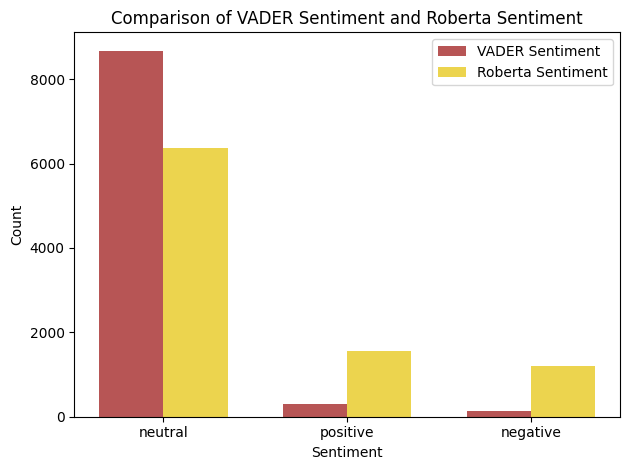

### safe final dataframe

In [ ]:
combined_toots.to_csv('data/mastodon_result_table.csv', index=False)

### comparison

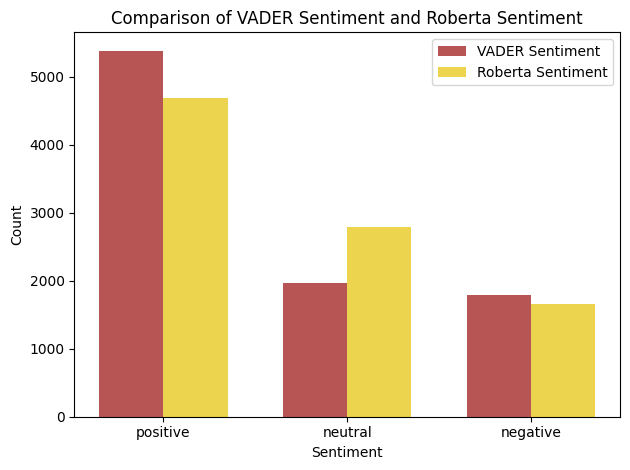

In [202]:
import numpy as np
import matplotlib.pyplot as plt

# Count the occurrences of each sentiment in vader_sentiment column
vader_sentiment_counts = combined_toots['vader_sentiment'].value_counts()

# Count the occurrences of each sentiment in roberta_sentiment column
roberta_sentiment_counts = combined_toots['roberta_sentiment'].value_counts()

# Get the sentiment labels
sentiment_labels = vader_sentiment_counts.index

# Define the positions for the bars
bar_width = 0.35
bar_positions = np.arange(len(sentiment_labels))

# Plot the bar chart
fig, ax = plt.subplots()
opacity = 0.8

vader_bars = ax.bar(bar_positions, vader_sentiment_counts, bar_width, alpha=opacity,
                    color='brown', label='VADER Sentiment')
roberta_bars = ax.bar(bar_positions + bar_width, roberta_sentiment_counts, bar_width, alpha=opacity,
                      color='#E8CA22', label='Roberta Sentiment')

# Add labels, title, and legend
ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
ax.set_title('Comparison of VADER Sentiment and Roberta Sentiment')
ax.set_xticks(bar_positions + bar_width / 2)
ax.set_xticklabels(sentiment_labels)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()



# <span style="color:blue; font-weight:bold;">Twitter</span>


## retreive data

In [216]:
#data can be retreived from Kaggle under the following link: https://www.kaggle.com/datasets/kaushiksuresh147/bitcoin-tweets
btc_tweets = pd.read_csv(r'/Users/matthiaszoettl/Desktop/WU/Master/4. Semester/Ai2/Analysis/data/bitcoin_tweets.csv')


/var/folders/w2/37ytbqkd5tl9krphhlsnj6m40000gn/T/ipykernel_85798/700551261.py:4: DtypeWarning: Columns (5,6,7,12) have mixed types. Specify dtype option on import or set low_memory=False.
  btc_tweets = pd.read_csv(r'/Users/matthiaszoettl/Desktop/WU/Master/4. Semester/Ai2/Analysis/data/bitcoin_tweets.csv')


## preproccessing of data

In [217]:
btc_tweets.shape

(227048, 13)

In [218]:
btc_tweets.dropna(axis=0 ,subset=['date','text'],inplace = True)
btc_tweets.reset_index(drop= True,inplace=True)
btc_tweets.shape

(227047, 13)

In [219]:
btc_tweets.dtypes

user_name           object 
user_location       object 
user_description    object 
user_created        object 
user_followers      float64
user_friends        object 
user_favourites     object 
user_verified       object 
date                object 
text                object 
hashtags            object 
source              object 
is_retweet          object 
dtype: object

In [220]:
btc_tweets = btc_tweets.convert_dtypes()
btc_tweets.dtypes

user_name           string 
user_location       string 
user_description    string 
user_created        string 
user_followers      Int64  
user_friends        object 
user_favourites     object 
user_verified       object 
date                string 
text                string 
hashtags            string 
source              string 
is_retweet          boolean
dtype: object

In [221]:
#could not convert date column, thus there seem to be some non-date values present

In [222]:
# Convert the date column to a datetime data type
btc_tweets['date'] = pd.to_datetime(btc_tweets['date'], errors='coerce')

# Create a mask to identify non-date values
mask = btc_tweets['date'].isnull()

# Filter the DataFrame to show rows with non-date values
non_date_values = btc_tweets[mask]

# Print the non-date values
print(non_date_values)


                                                         user_name  \
64943   Can roam the world，It's nine to five againᵕᴗᵕ)♡   #Bitcoin   
137068   *Muhammad Yasir* hello stalker nice to tweet you :)         
180575   • Learn n To Do d'Best...!!!!!!!!                           

              user_location user_description user_created  user_followers  \
64943   2020-11-09 19:44:24  9                141          36               
137068  2009-08-31 07:40:42  280.0            623          499              
180575  2010-08-16 10:55:09  52.0             277          127              

       user_friends      user_favourites  \
64943   False        2021-04-07 16:23:03   
137068  False        2021-06-23 14:51:12   
180575  False        2021-06-22 13:31:16   

                                                                                                                                                                                                                                         

In [223]:

# Convert 'Date' column to datetime and remove NaN and non-date values
btc_tweets['date'] = pd.to_datetime(btc_tweets['date'], errors='coerce')

# Remove rows with NaN values in the 'Date' column
btc_tweets = btc_tweets.dropna(subset=['date'])


In [224]:
btc_tweets['date'] = pd.to_datetime(btc_tweets['date'])

In [225]:
btc_tweets.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups, posts are not the view of my employer, RTs are not endorsements, military brat, @UNC alumnus, ΚΑΨ♦️ΦΝΠ, -DW = Me",2009-04-26 20:05:09,8534,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #bitcoin ATM announcement https://t.co/xaaZmaJKiV @MyBlueRidgeBank… https://t.co/sgBxMkP1SI,['bitcoin'],Twitter Web App,False
1,CryptoND,<NA>,😎 BITCOINLIVE is a Dutch platform aimed at informing the general public about crypto & technology! 😉 AND promoting it: https://t.co/5RYdRnUSud,2019-10-17 20:12:10,6769,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""🎬 Take 2"" with our friend @LeoWandersleb, #Btc #wallet #security expe… https://t.co/go6aDgRml5","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, #Cryptocurrency trading education platform: https://t.co/LUr56q3Q19 🙋‍♂️ 💰 💰in the World 🗺..",2014-11-10 10:50:37,128,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about BTC and would like to share with you all - https://t.co/QxCZgmuy3B… https://t.co/o6wn7ppkVY",<NA>,Twitter Web App,False
3,Crypto is the future,<NA>,"I will post a lot of buying signals for BTC trading, so I hope that you block me. Drop all everything, Buy Bitcoin for the future I was together with you!",2019-09-28 16:48:12,625,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \4872644.0 (2021/02/11 08:51) #Bitcoin #FX #BTC #crypto,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,"Co-founder @RENJERJerky | Forbes 30Under30 | Innovation Economist, Lateral Thinker, Futurist, #Crypto-enthusiast, facts over ideology! #Bitcoin",2016-02-03 13:15:55,1249,1472,10482,False,2021-02-10 23:54:06,"This network is secured by 9 508 nodes as of today. Soon, the biggest bears will recognise: #BTC in too big to fail… https://t.co/1XovDA8rKw",['BTC'],Twitter Web App,False


In [226]:
import pandas as pd

# Sort DataFrame by 'date' column
sorted_df = btc_tweets.sort_values('date')

# Check the sorted DataFrame
display(sorted_df[["date", "text"]])


,date,text
21523,2021-02-05 10:52:04,2⃣ Debunking 9 #Bitcoin Myths by @Patrick_Lowry_ ⬇️ #cryptocurrency #bitcoin #crypto #blockchain #btc… https://t.co/2CM83fuB2n
21524,2021-02-05 10:52:04,📖 Weekend Read 📖 Keen to learn about #crypto assets? Check out our reading list! 1⃣ 2021 CryptoMarket Outlook… https://t.co/opiev94qzl
21522,2021-02-05 10:52:06,4⃣ 🎙️ Bloomberg LP #CryptoOutlook 2021 with @mikemcglone11 ⬇️ #cryptocurrency #bitcoin #crypto #blockchain #btc… https://t.co/gC3VNGAP6v
21521,2021-02-05 10:52:07,"5⃣ #Blockchain 50 2021 by @DelRayMan, @Forbes , @ForbesCrypto ⬇️ #cryptocurrency #bitcoin #crypto #blockchain… https://t.co/L3Xj7j49Fx"
21520,2021-02-05 10:52:26,#reddcoin #rdd @reddcoin to the moon #altcoin #turnreddcoinin1dollar #eth #btc #bitcoin https://t.co/ycm15VolsW
...,...,...
128430,2021-06-23 19:29:21,Buy #snapchat here is a one day growth on my small portfolio. #doge #Bitcoin📷 #BitcoinCrash #cryptocurrency #Crypto #cryptocrash https://t.co/4LVYz4rNzf #Tesla #NBA #NBAplayoffs https://t.co/H9swIzDzTC
128429,2021-06-23 19:29:31,"@traderrocko @APompliano Exactly , #Bitcoin welcome $100"
128428,2021-06-23 19:29:33,"Official ESHOP Airdrop. If You Missed Meme Token Rally, Don't Miss ESHOP. Join Now: https://t.co/FFbb9IEpaz Join our Telegram: https://t.co/53Q91rReSO @EShop_Token @elonmusk #cryptocurrency #BSC #Bitcoin #Ethereum #ETH #Airdrop #bounty #ESHOP #Airdrops"
128427,2021-06-23 19:29:35,"$BTCUSD Current Bitcoin Price: $33,412 Day High: $34,701 Day Low: $31,773 Year Low: $8,976 Year High: $64,863 65 Day Moving Avg: $42,716 10 Day Moving Avg: $35,609 #Bitcoin #RealMoney #BTC #Cypto"


In [227]:
def preprocess_tweet(tweet):
    # Lowercasing
    tweet = tweet.lower()

    # Remove @usernames
    tweet = re.sub('@[\w]+', '', tweet)

    # Remove URLs
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)

    # Removing special characters and symbols except emojis
    tweet = re.sub(
    r"[^a-zA-Z\s\U0001F300-\U0001F5FF\U0001F600-\U0001F64F\U0001F680-\U0001F6FF"
    r"\U0001F900-\U0001F9FF\U0001FA70-\U0001FAFF\U00002702-\U000027B0]+", " ", tweet)
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(tweet)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Removing stopwords
    stop_words = set(stopwords.words("english"))
    filtered_tokens = [token for token in lemmatized_tokens if token not in stop_words]

    # Joining tokens
    preprocessed_tweet = " ".join(filtered_tokens)

    return preprocessed_tweet


In [228]:
# Assuming you have a DataFrame called btc_tweets with a column named "text"
btc_tweets['preprocessed_text'] = btc_tweets['text'].apply(preprocess_tweet)

## sentiment analysis

### Vader

In [233]:
sia_vader = SentimentIntensityAnalyzer()
for i, row in btc_tweets.iterrows():
    try:
        toot = row['preprocessed_text']
        vader_result = sia_vader.polarity_scores(toot)
        btc_tweets.at[i, 'vader_neg'] = vader_result['neg']
        btc_tweets.at[i, 'vader_neu'] = vader_result['neu']
        btc_tweets.at[i, 'vader_pos'] = vader_result['pos']
        btc_tweets.at[i, 'vader_compound'] = vader_result['compound']
    except RuntimeError:
        print(f'Error occurred for toot at index {i}')



In [236]:
# Define a function to determine the vader_sentiment based on the compound score
def get_vader_sentiment(row):
    compound_score = row['vader_compound']
    if compound_score >= 0.05:
        return 'positive'
    elif compound_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply the function to create the vader_sentiment column
btc_tweets['vader_sentiment'] = btc_tweets.apply(get_vader_sentiment, axis=1)


In [237]:
btc_tweets['vader_sentiment'].value_counts()

positive    114719
neutral     76064 
negative    36261 
Name: vader_sentiment, dtype: int64

### roBERTa

In [244]:
#special preprocessing for roBERTa Model
import numpy as np

def preprocess_tweet_roberta(tweet):
    # Replace words starting with '@' with '@user'
    tweet = tweet.str.replace(r'@\w+', '@user')

    # Replace words starting with 'http' with 'http'
    tweet = tweet.str.replace(r'http\S+', 'http')
    preprocessed_tweet = tweet

    return preprocessed_tweet


In [245]:
# Apply the preprocessing function to the "text" column and store the results in a new column "preprocessed_text_roberta"
btc_tweets['preprocessed_text_roberta'] = preprocess_tweet_roberta(btc_tweets['text'])

/var/folders/w2/37ytbqkd5tl9krphhlsnj6m40000gn/T/ipykernel_85798/271085028.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  tweet = tweet.str.replace(r'@\w+', '@user')
/var/folders/w2/37ytbqkd5tl9krphhlsnj6m40000gn/T/ipykernel_85798/271085028.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  tweet = tweet.str.replace(r'http\S+', 'http')


In [250]:


from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

In [249]:
roberta = "cardiffnlp/twitter-roberta-base-sentiment"

In [251]:
model = AutoModelForSequenceClassification.from_pretrained(roberta)
tokenizer = AutoTokenizer.from_pretrained(roberta)

In [252]:
def polarity_scores_roberta(tweet):
    encoded_tweet = tokenizer(tweet, return_tensors='pt')
    output = model(**encoded_tweet)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        "roberta_neg" : scores[0],
        "roberta_neu" : scores[1],
        "roberta_pos" : scores[2]
    }
    return scores_dict

In [253]:
#use GPU if possible for faster compute
import torch
import torch.cuda

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)


In [254]:
#keep in mind this might take a rather long time to run (took me 3h)
for i, row in btc_tweets.iterrows():
    try:
        tweet = row['preprocessed_text_roberta']
        roberta_result = polarity_scores_roberta(tweet)
        btc_tweets.at[i, 'roberta_neg'] = roberta_result['roberta_neg']
        btc_tweets.at[i, 'roberta_neu'] = roberta_result['roberta_neu']
        btc_tweets.at[i, 'roberta_pos'] = roberta_result['roberta_pos']
    except RuntimeError:
        print(f'Error occurred for toot at index {i}')



In [256]:
# Define a function to determine the roberta_sentiment based on the polarity scores
def get_roberta_sentiment(row):
    max_score = max(row['roberta_neg'], row['roberta_neu'], row['roberta_pos'])
    if max_score == row['roberta_pos']:
        return 'positive'
    elif max_score == row['roberta_neg']:
        return 'negative'
    else:
        return 'neutral'

# Apply the function to create the roberta_sentiment column
btc_tweets['roberta_sentiment'] = btc_tweets.apply(get_roberta_sentiment, axis=1)

### safe final dataframe

In [257]:
btc_tweets.to_csv('data/twitter_result_table.csv', index=False)

### comparison

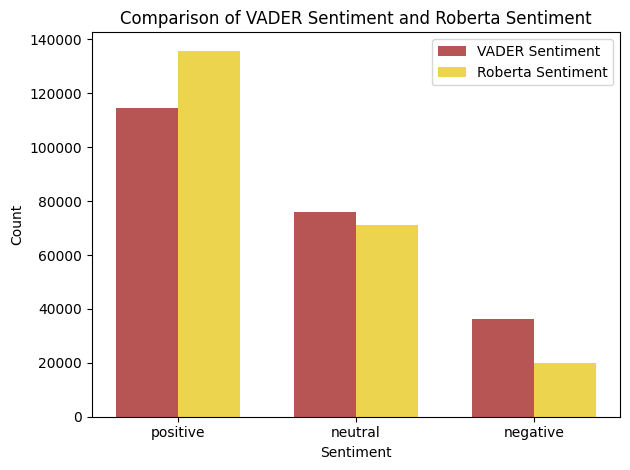

In [259]:
import numpy as np
import matplotlib.pyplot as plt

# Count the occurrences of each sentiment in vader_sentiment column
vader_sentiment_counts = btc_tweets['vader_sentiment'].value_counts()

# Count the occurrences of each sentiment in roberta_sentiment column
roberta_sentiment_counts = btc_tweets['roberta_sentiment'].value_counts()

# Get the sentiment labels
sentiment_labels = vader_sentiment_counts.index

# Define the positions for the bars
bar_width = 0.35
bar_positions = np.arange(len(sentiment_labels))

# Plot the bar chart
fig, ax = plt.subplots()
opacity = 0.8

vader_bars = ax.bar(bar_positions, vader_sentiment_counts, bar_width, alpha=opacity,
                    color='brown', label='VADER Sentiment')
roberta_bars = ax.bar(bar_positions + bar_width, roberta_sentiment_counts, bar_width, alpha=opacity,
                      color='#E8CA22', label='Roberta Sentiment')

# Add labels, title, and legend
ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
ax.set_title('Comparison of VADER Sentiment and Roberta Sentiment')
ax.set_xticks(bar_positions + bar_width / 2)
ax.set_xticklabels(sentiment_labels)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()



# Comparative Analysis

In [4]:
#load data
sentiment_twitter = pd.read_csv(r'/Users/matthiaszoettl/Desktop/WU/Master/4. Semester/Ai2/Analysis/data/twitter_result_table.csv')
sentiment_mastodon = pd.read_csv(r'/Users/matthiaszoettl/Desktop/WU/Master/4. Semester/Ai2/Analysis/data/mastodon_result_table.csv')

In [5]:
sentiment_twitter["roberta_sentiment"].value_counts()

neutral     135841
positive     71145
negative     20058
Name: roberta_sentiment, dtype: int64

In [6]:
sentiment_mastodon["roberta_sentiment"].value_counts()

neutral     4689
positive    2788
negative    1653
Name: roberta_sentiment, dtype: int64

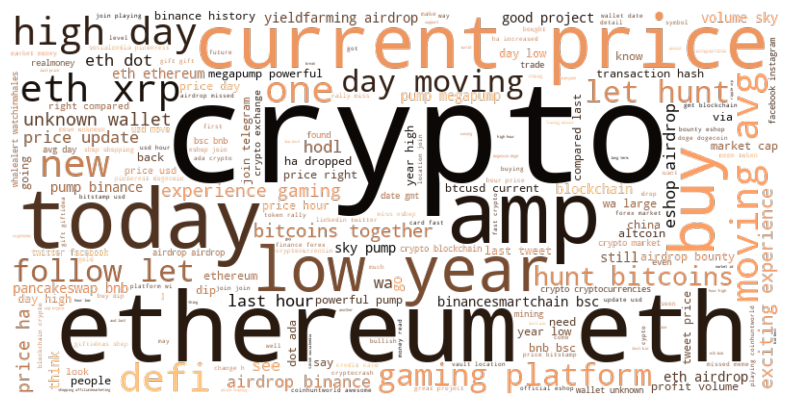

In [334]:
#wordcloud for Twitter dataset

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Define your list of stop words
stopwords = set(STOPWORDS)
stopwords.update(["bitcoin", "btc", "cryptocurrency", "cryptocurr", "cryptocurrie", "cryptocurrie"])  # replace with words you want to exclude

# Convert float values to strings in the preprocessed_text column
sentiment_twitter['preprocessed_text'] = sentiment_twitter['preprocessed_text'].astype(str)

# Concatenate all the tweets into one string
all_tweets = ' '.join(sentiment_twitter['preprocessed_text'])

# Create a word cloud
wordcloud = WordCloud(stopwords=stopwords, width=800, height=400, background_color=None, mode="RGBA", colormap='copper').generate(all_tweets)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Save the figure with transparent background
#plt.savefig('wordcloud_twitter.png', bbox_inches='tight', transparent=True)

# Show the plot
plt.show()


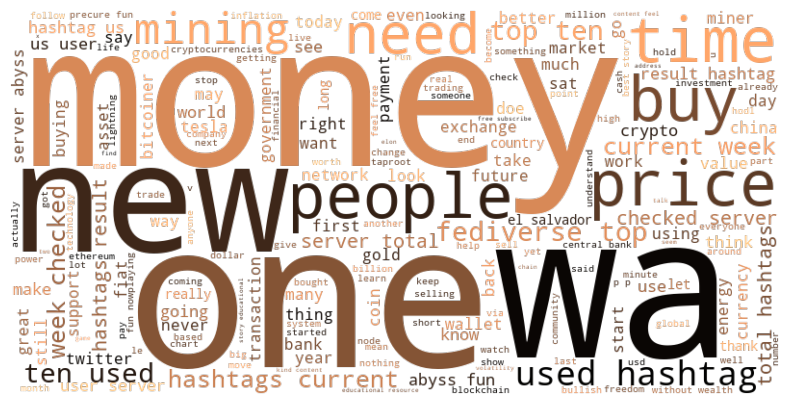

In [345]:
#wordcloud for Mastodon dataset

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Define your list of stop words
stopwords = set(STOPWORDS)
stopwords.update(["bitcoin", "btc", "cryptocurrency", "cryptocurr", "cryptocurrie", "cryptocurrie", "RT", "ha"])  # replace with words you want to exclude

# Convert float values to strings in the preprocessed_text column
sentiment_mastodon['preprocessed_text'] = sentiment_mastodon['preprocessed_text'].astype(str)

# Concatenate all the tweets into one string
all_toots = ' '.join(sentiment_mastodon['preprocessed_text'])

# Create a word cloud
wordcloud = WordCloud(stopwords=stopwords, width=800, height=400, background_color=None, mode="RGBA", colormap='copper').generate(all_toots)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Save the figure with transparent background
plt.savefig('wordcloud_mastodon.png', bbox_inches='tight', transparent=True)

# Show the plot
plt.show()


<Figure size 640x480 with 0 Axes>

after spot checking the the Models, Vader and roBERTa, it seems like roBERTa was overall a touch better at categorizing the toots/tweets. Thus the following comparative analysis will mainly work with the sentiment results obtained by the roBERTa model

In [12]:
import pandas as pd
from scipy.stats import chi2_contingency

# Count the number of each sentiment in the sentiment_twitter DataFrame
tweet_counts = sentiment_twitter['roberta_sentiment'].value_counts()

# Normalize to get proportions
tweet_props = tweet_counts / len(sentiment_twitter)

# Do the same for the sentiment_mastodon DataFrame
toot_counts = sentiment_mastodon['roberta_sentiment'].value_counts()
toot_props = toot_counts / len(sentiment_mastodon)

# Print the results
print("Sentiment Twitter proportions:")
print(tweet_props)
print("\nSentiment Mastodon proportions:")
print(toot_props)

# Create a contingency table
contingency = pd.DataFrame(list(zip(tweet_counts, toot_counts)),
                           columns=['sentiment_twitter', 'sentiment_mastodon'],
                           index=['neutral', 'positive', 'negative'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency)

# Print the p-value
print(f"\nP-value: {p}")


Sentiment Twitter proportions:
neutral     0.598303
positive    0.313353
negative    0.088344
Name: roberta_sentiment, dtype: float64

Sentiment Mastodon proportions:
neutral     0.513582
positive    0.305367
negative    0.181051
Name: roberta_sentiment, dtype: float64

P-value: 2.6978498793808697e-202


the chi square test indicates a significant results in the difference of sentiment for Twitter vs Mastodon with a p value < 0.05

In [16]:
import numpy as np

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency)

# Calculate the standardized residuals
residuals = (contingency - expected) / np.sqrt(expected)

# Print the results
print("\nChi-square test p-value: ", p)
print("\nStandardized residuals:")
print(residuals)



Chi-square test p-value:  2.6978498793808697e-202

Standardized residuals:
          sentiment_twitter  sentiment_mastodon
neutral            2.023093          -10.088709
positive           0.262932           -1.311183
negative          -5.632278           28.086894


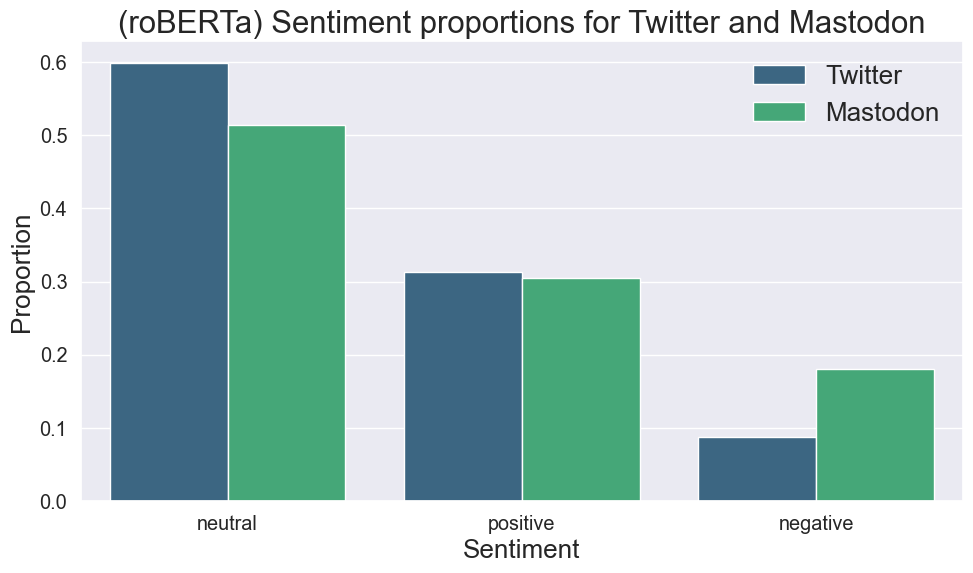

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a theme for seaborn
sns.set_theme(style="whitegrid")

# Set font scale for larger text, good for presentations
sns.set(font_scale=1.3)

# Concatenate the two proportions series into a dataframe
combined_props = pd.concat([tweet_props, toot_props], axis=1)
combined_props.columns = ['Twitter', 'Mastodon']

# Reset index to use in the plot
combined_props.reset_index(inplace=True)
combined_props.rename(columns={'index': 'Sentiment'}, inplace=True)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10,6))

# Use seaborn to create a barplot with custom colors
sns.barplot(x='Sentiment', y='value', hue='variable', 
            data=pd.melt(combined_props, ['Sentiment']),
            palette='viridis',  # use a color palette, viridis is just one of many options
            ax=ax)  # use the created Axis

# Increase the size of the legend and move it outside the plot
ax.legend(frameon=False, fontsize='large', bbox_to_anchor=(1, 1))

# Add labels and a title with increased size
ax.set_xlabel('Sentiment', fontsize='large')
ax.set_ylabel('Proportion', fontsize='large')
ax.set_title('(roBERTa) Sentiment proportions for Twitter and Mastodon', fontsize='x-large')

# Show the plot with a tight layout
plt.tight_layout()
plt.show()


# Show the plot with a tight layout
#plt.tight_layout()

# Save the figure
#plt.savefig('roberta_sentiment_twitter_vs_mastodon.png')


/var/folders/w2/37ytbqkd5tl9krphhlsnj6m40000gn/T/ipykernel_85798/960348012.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(all_data[all_data['source'] == 'twitter']['roberta_' + sentiment],
/var/folders/w2/37ytbqkd5tl9krphhlsnj6m40000gn/T/ipykernel_85798/960348012.py:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44

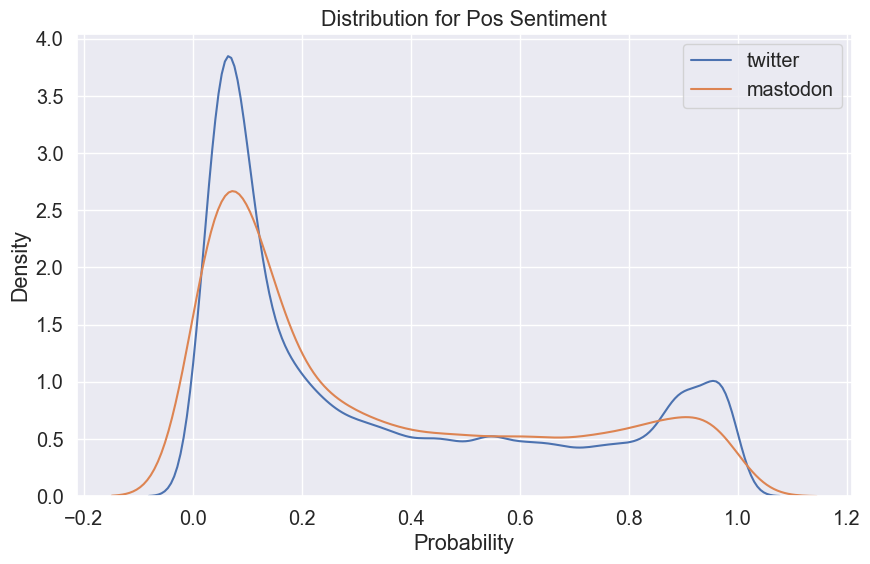

/var/folders/w2/37ytbqkd5tl9krphhlsnj6m40000gn/T/ipykernel_85798/960348012.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(all_data[all_data['source'] == 'twitter']['roberta_' + sentiment],
/var/folders/w2/37ytbqkd5tl9krphhlsnj6m40000gn/T/ipykernel_85798/960348012.py:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44

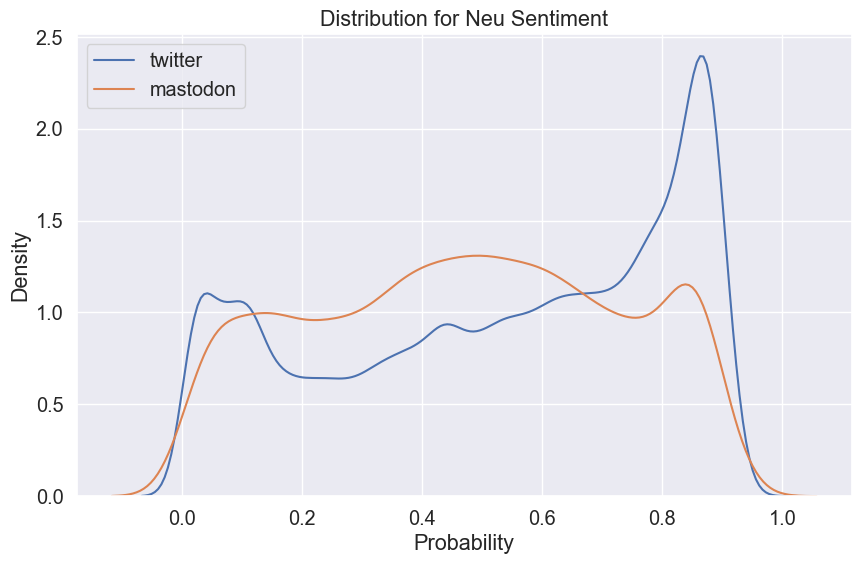

/var/folders/w2/37ytbqkd5tl9krphhlsnj6m40000gn/T/ipykernel_85798/960348012.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(all_data[all_data['source'] == 'twitter']['roberta_' + sentiment],
/var/folders/w2/37ytbqkd5tl9krphhlsnj6m40000gn/T/ipykernel_85798/960348012.py:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44

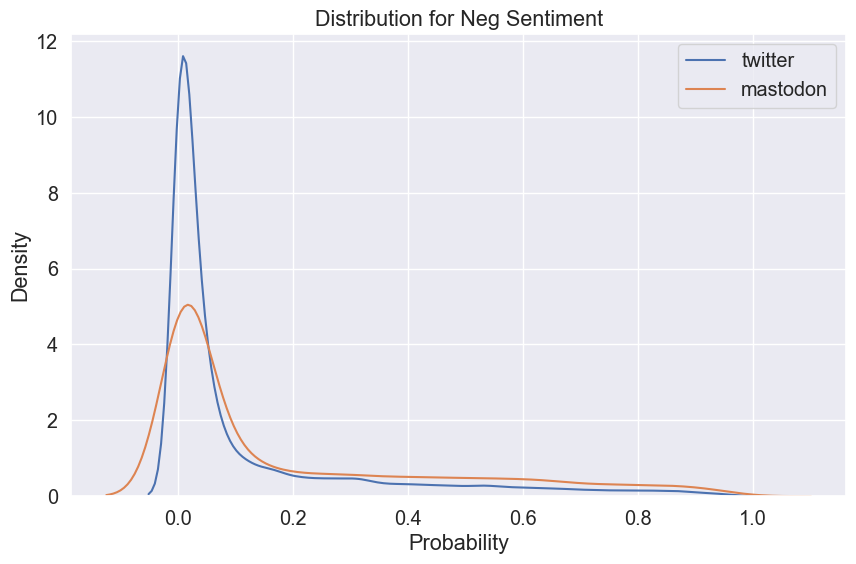

In [396]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for the plots
sentiment_twitter['source'] = 'twitter'
sentiment_mastodon['source'] = 'mastodon'

all_data = pd.concat([sentiment_twitter, sentiment_mastodon])

# List of sentiments
sentiments = ['pos', 'neu', 'neg']

# Plot distplots for each sentiment
for sentiment in sentiments:
    plt.figure(figsize=(10, 6))

    # Distplot for btc_tweets
    sns.distplot(all_data[all_data['source'] == 'twitter']['roberta_' + sentiment], 
                 hist = False, kde = True, label='twitter')

    # Distplot for combined_toots
    sns.distplot(all_data[all_data['source'] == 'mastodon']['roberta_' + sentiment], 
                 hist = False, kde = True, label='mastodon')
    
    plt.title(f"Distribution for {sentiment.capitalize()} Sentiment")
    plt.xlabel('Probability')
    plt.ylabel('Density')
    plt.legend()
    plt.show()


In [353]:
combined_props

,Sentiment,Twitter,Mastodon
0,neutral,0.598303,0.513582
1,positive,0.313353,0.305367
2,negative,0.088344,0.181051
